### t2.micro, AWS Marketplace -> Anaconda with Python 3

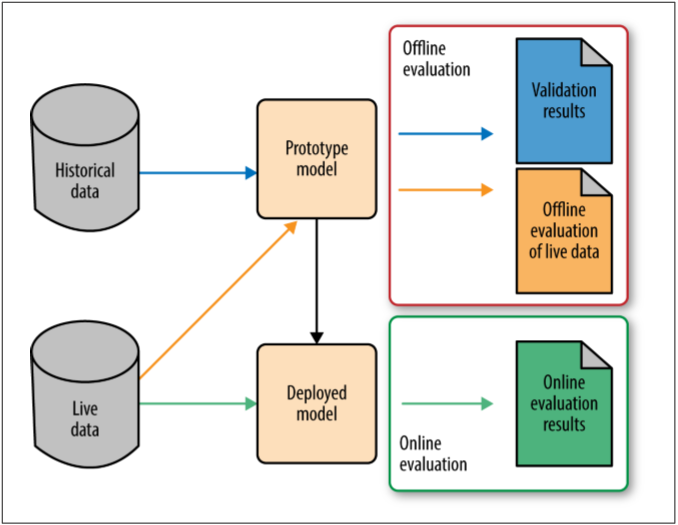

In [1]:
from IPython.display import Image
Image(filename='OnlineOfflineEvaluation.png', width=300, height=300)

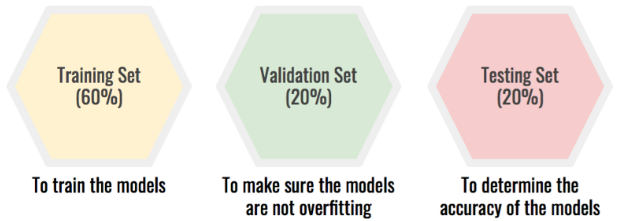

In [2]:
from IPython.display import Image
Image(filename='TrainingValidationTesting.png', width=300, height=300)

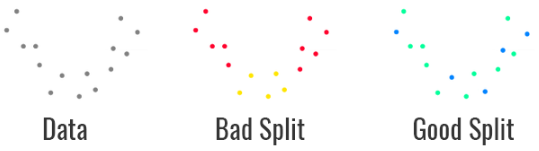

In [3]:
from IPython.display import Image
Image(filename='ShuffleDataToBalanceData.png', width=300, height=300)

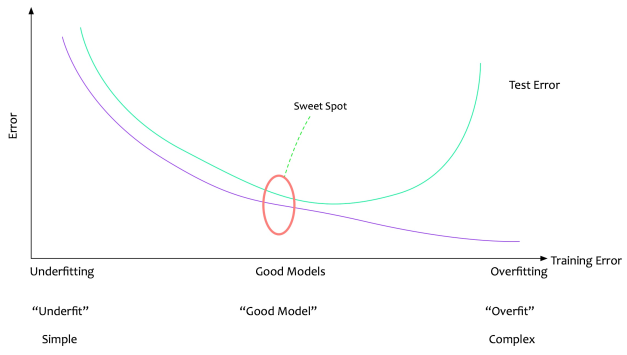

In [4]:
from IPython.display import Image
Image(filename='OptimalModel.png', width=400, height=400)

### 1) Accuracy

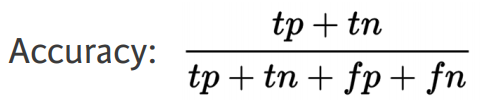

In [5]:
from IPython.display import Image
Image(filename='Accuracy.png', width=300, height=300)

### Accuracy Paradox

-  The accuracy paradox is the paradoxical finding that accuracy is not a good metric for predictive models when classifying in predictive analytics.
-  This is because a simple model may have a high level of accuracy but be too crude to be useful.
-  For example, if the incidence of category A is dominant and found in 99% of cases, then predicting every case is category A has an accuracy of 99%.
-  Precision and recall are better measures in such cases.
-  The underlying issue is that class priors need to be accounted for in error analysis.
-  Precision and recall help, but precision too can be biased by very unbalanced class priors in the test sets.

### 2) Confusion Matrix

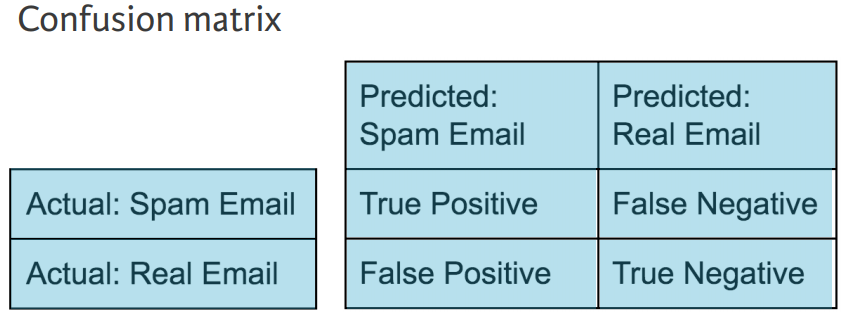

In [6]:
from IPython.display import Image
Image(filename='Confusion.png', width=300, height=300)

-  True positives : The model predicts an observation belongs to a class and it does.
-  True negatives : The model predicts an observation does not belong to a class and it does not.
-  False positives : The model predicts an observation belongs to a class when it does not.
-  False negatives : The model predicts an observation does not belong to a class when it does.

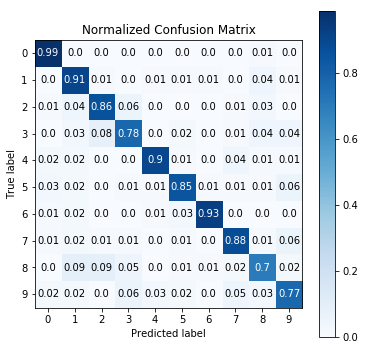

In [8]:
import scikitplot as skplt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

X, y = load_digits(return_X_y=True)
skplt.metrics.plot_confusion_matrix(
                                    y_true    = y                                                                    ,
                                    y_pred    = cross_val_predict(RandomForestClassifier(n_estimators=5), X, y, cv=5),
                                    normalize = True                                                                 ,
                                    figsize   = (6,6)
                                   )

### 3) Receiver Operating Characteristic

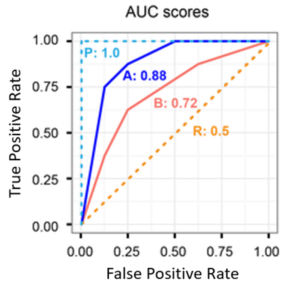

In [1]:
from IPython.display import Image
Image(filename='AUCScores.png', width=300, height=300)

-  A perfect machine learning model will have an AUC of 1.0 (cyan).
-  A random model will have an AUC of 0.5 (orange). 
-  A good model will be over 0.7.
-  A great model will be over 0.85. 
-  It is not possible to perfectly classify a data set, but the AUC is a good way to compare models and give a sense of how trustworthy the model is.

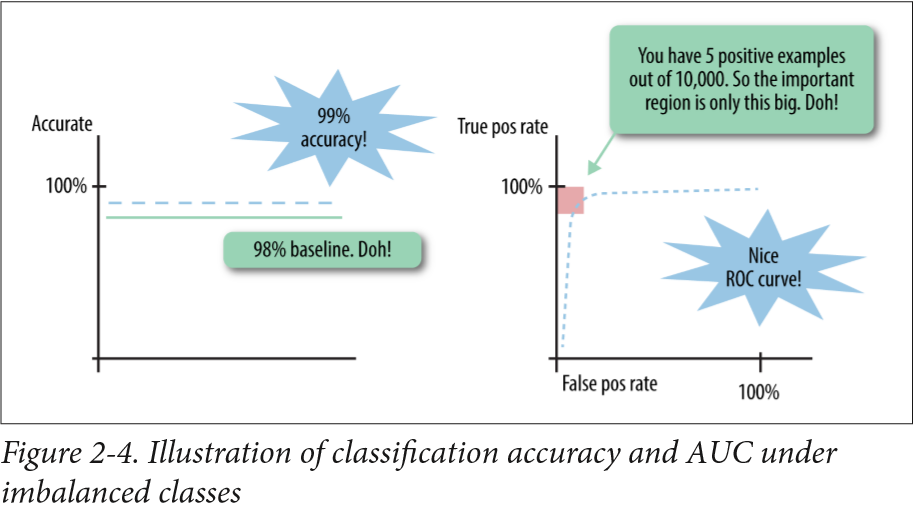

In [2]:
from IPython.display import Image
Image(filename='ImbalancedClasses.png', width=500, height=500)

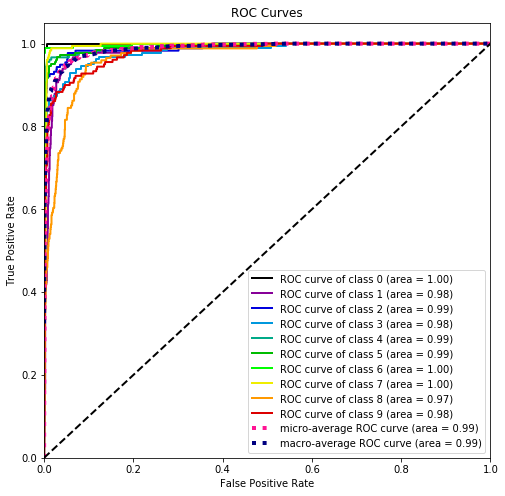

In [4]:
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits as load_data

X, y = load_data(return_X_y=True)
skplt.metrics.plot_roc(
                       y_true   = y                                      ,
                       y_probas = GaussianNB().fit(X, y).predict_proba(X),
                       figsize  = (8,8)
                      )

### 4) Precision-Recall Curve

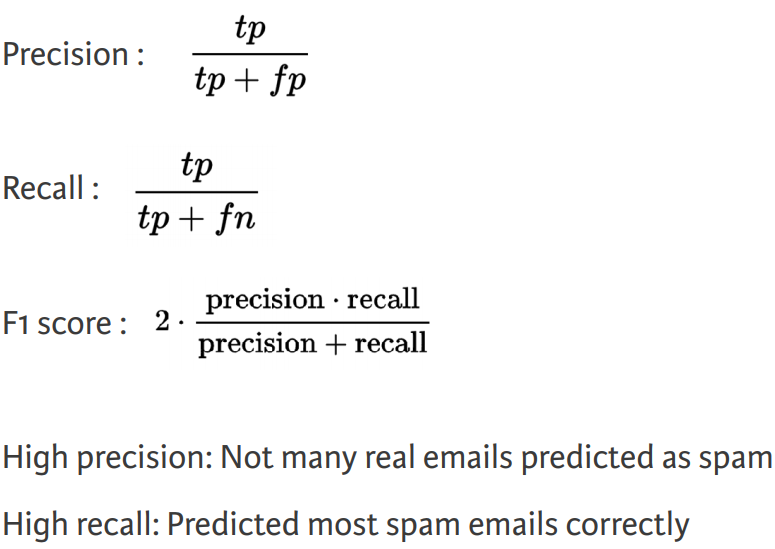

In [1]:
from IPython.display import Image
Image(filename='PrecisionRecallF1.png', width=300, height=300)

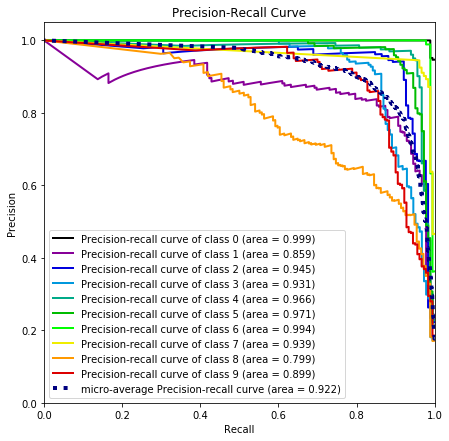

In [3]:
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits as load_data

X, y = load_data(return_X_y=True)
skplt.metrics.plot_precision_recall(
                                    y_true   = y                                      ,
                                    y_probas = GaussianNB().fit(X, y).predict_proba(X),
                                    figsize  = (7,7)
                                   )

### 5) Learning Curve

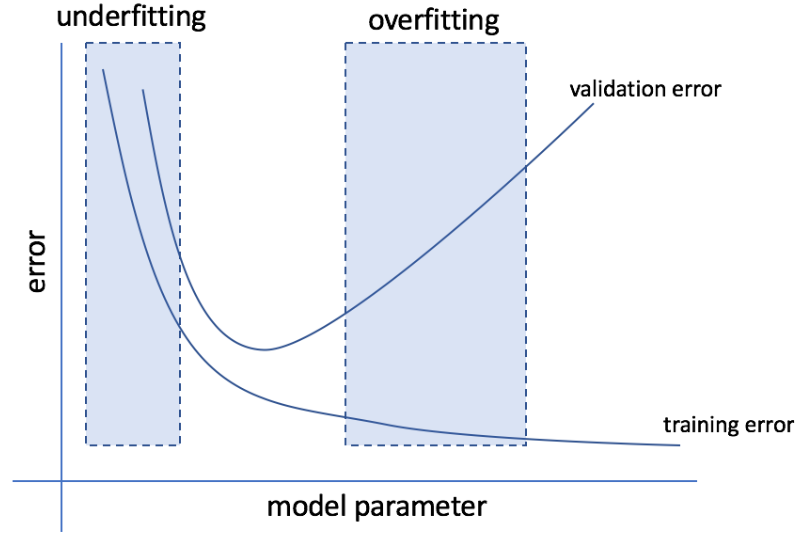

In [1]:
from IPython.display import Image
Image(filename='ValidationCurve_01.png', width=300, height=300)

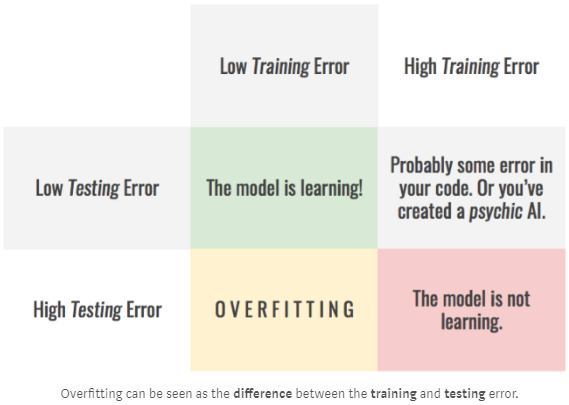

In [2]:
from IPython.display import Image
Image(filename='ValidationCurve_02.png', width=400, height=400)

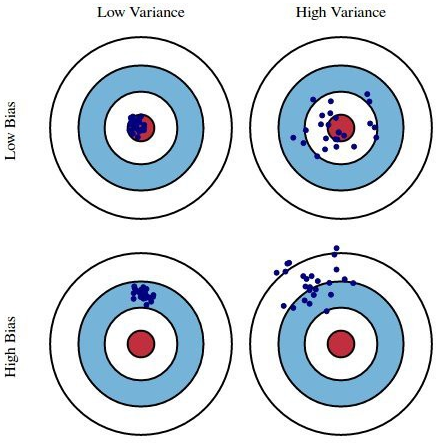

In [3]:
from IPython.display import Image
Image(filename='BiasVariance.png', width=300, height=300)

-  High Bias implies our estimate based on the observed data is not close to the true parameter (aka., underfitting)
-  High Variance implies estimates are sensitive to sampling.  They will vary a lot if we compute them with a different sample of data (aka., overfitting)

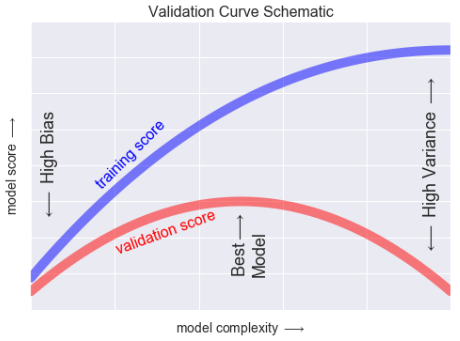

In [4]:
from IPython.display import Image
Image(filename='ValidationCurve_03.png', width=300, height=300)

-  The training score is everywhere higher than the validation score: the model will be a better fit to data it has seen than to data it has not seen.
-  For low model complexity (high-bias), the training data is under-fit, thus the model is a poor predictor for the training data and unseen data.
-  For high model complexity (high-variance), the training data is over-fit, thus the model predicts the training data well, but fails for unseen data.
-  For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

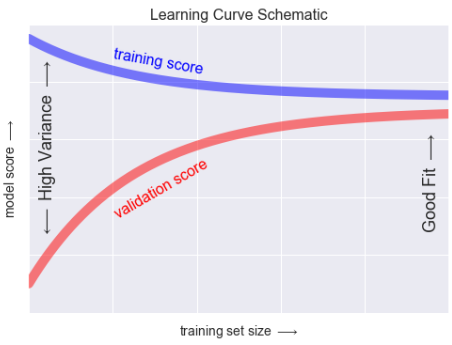

In [5]:
from IPython.display import Image
Image(filename='ValidationCurve_04.png', width=300, height=300)

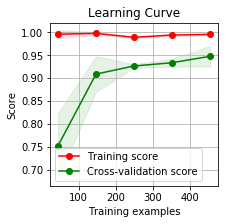

In [7]:
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer as load_data

X, y = load_data(return_X_y=True)
skplt.estimators.plot_learning_curve(
                                     clf     = RandomForestClassifier(n_estimators=5),
                                     X       = X                                     ,
                                     y       = y                                     ,
                                     cv      = 5                                     ,
                                     figsize = (3,3)
                                    )

### 6) Lift Curve

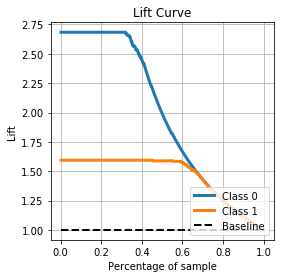

In [2]:
import warnings
warnings.filterwarnings('ignore')

import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer as load_data

X, y = load_data(return_X_y=True)
skplt.metrics.plot_lift_curve(
                              y_true   = y                                                                , 
                              y_probas = LogisticRegression(solver='liblinear').fit(X, y).predict_proba(X), 
                              figsize  = (4,4)
                             )

### 7) Cumulative Gain Curve

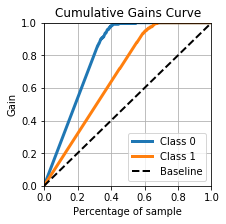

In [2]:
import warnings
warnings.filterwarnings('ignore')

import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer as load_data

X, y = load_data(return_X_y=True)
skplt.metrics.plot_cumulative_gain(
                                   y_true   = y                                                                ,
                                   y_probas = LogisticRegression(solver='liblinear').fit(X, y).predict_proba(X),
                                   figsize  = (3,3)
                                  )

### 8) Kolmogorov-Smirnov Curve

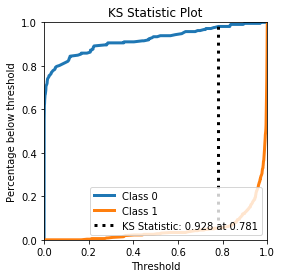

In [2]:
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer as load_data

X, y = load_data(return_X_y=True)
skplt.metrics.plot_ks_statistic(
                                y_true   = y,
                                y_probas = LogisticRegression(solver='liblinear').fit(X, y).predict_proba(X),
                                figsize  = (4,4)
                               )

### 9) Silhouette Analysis

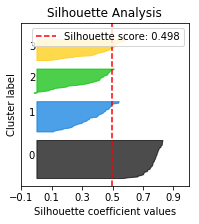

In [2]:
import scikitplot as skplt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris as load_data

X, y = load_data(return_X_y=True)
skplt.metrics.plot_silhouette(
                              X              = X                                  ,
                              cluster_labels = KMeans(n_clusters=4).fit_predict(X),
                              figsize        = (3,3)
                             )

### 10) Elbow Plot

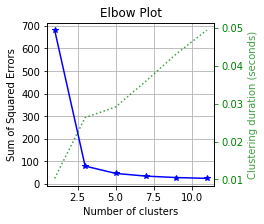

In [2]:
import scikitplot as skplt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris as load_data

X, y = load_data(return_X_y=True)
skplt.cluster.plot_elbow_curve(
                               clf            = KMeans(),
                               X              = X       ,
                               figsize        = (3,3)
                              )

### 11) Probability Calibration Curve

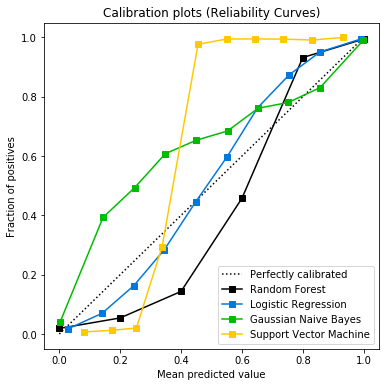

In [2]:
import scikitplot as skplt
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X, y                             = make_classification(n_samples=100000)
X_train, y_train, X_test, y_test = X[:1000], y[:1000], X[1000:], y[1000:]

skplt.metrics.plot_calibration_curve(
          y_true      = y_test,
          probas_list = [
                         RandomForestClassifier(n_estimators=5).fit(X_train, y_train).predict_proba(X_test),
                         LogisticRegression(solver='liblinear').fit(X_train, y_train).predict_proba(X_test),
                         GaussianNB().fit(X_train, y_train).predict_proba(X_test)                          ,
                         LinearSVC(max_iter=10000).fit(X_train, y_train).decision_function(X_test)
                        ]     ,
          clf_names   = [
                         'Random Forest'         ,
                         'Logistic Regression'   ,
                         'Gaussian Naive Bayes'  ,
                         'Support Vector Machine'
                        ]     ,
          figsize     = (6,6)
                                    )